In [1]:
import streamlit as st
from pathlib import Path
import google.generativeai as genai
from dotenv import load_dotenv
import os

d:\Github Project\HealthCareBot-With-Gemini\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()
genai.configure(api_key=os.getenv("API_KEY"))

In [3]:
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 0,
  "max_output_tokens": 8192,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

In [4]:
system_prompts = [
    """
    You are a domain expert in medical image analysis. You are tasked with 
    examining medical images for a renowned hospital.
    Your expertise will help in identifying or 
    discovering any anomalies, diseases, conditions or
    any health issues that might be present in the image.
    
    Your key responsibilites:
    1. Detailed Analysis : Scrutinize and thoroughly examine each image, 
    focusing on finding any abnormalities.
    2. Analysis Report : Document all the findings and 
    clearly articulate them in a structured format.
    3. Recommendations : Basis the analysis, suggest remedies, 
    tests or treatments as applicable.
    4. Treatments : If applicable, lay out detailed treatments 
    which can help in faster recovery.
    
    Important Notes to remember:
    1. Scope of response : Only respond if the image pertains to 
    human health issues.
    2. Clarity of image : In case the image is unclear, 
    note that certain aspects are 
    'Unable to be correctly determined based on the uploaded image'
    3. Disclaimer : Accompany your analysis with the disclaimer: 
    "Consult with a Doctor before making any decisions."
    4. Your insights are invaluable in guiding clinical decisions. 
    Please proceed with the analysis, adhering to the 
    structured approach outlined above.
    
    Please provide the final response with these 4 headings : 
    Detailed Analysis, Analysis Report, Recommendations and Treatments
    
"""
]

In [5]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


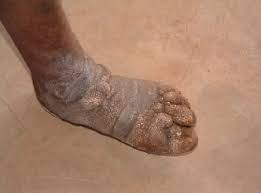

Detailed analysis based on the uploaded image:
## Detailed Analysis: 
The image appears to show a foot, likely a child's foot, with a significant amount of what looks like white chalky substance covering it. It's difficult to ascertain the condition of the skin underneath. The toes appear abnormally thick and misshapen, possibly swollen. The overall shape of the foot could suggest a medical condition. 

## Analysis Report:
The image raises concerns about the following possibilities:

* **Parasitic infection:** The swelling and potential cracks in the skin could indicate a parasitic infection, such as hookworm or loiasis, which are common in tropical regions.
* **Lymphatic filariasis (Elephantiasis):** The significant swelling and possible skin thickening could be symptoms of  lymphatic filariasis, a parasitic infection that affects the lymphatic system. 
* **Other skin conditions:** The whiteness could be due to a fungal infection,  severe eczema, or other skin conditions that cause sc

In [17]:
from PIL import Image
import io

# Step 1: Upload image
file_path = "D:\Github Project\HealthCareBot-With-Gemini\images2.jpg"
try:
    with open(file_path, 'rb') as file:
        image_data = file.read()
    image = Image.open(io.BytesIO(image_data))
    display(image)
    
    # Step 2: Generate analysis (Placeholder for actual implementation)
    submit = 'y'
    if submit == "y":
        image_parts = [
            {
                "mime_type": "image/jpg",
                "data": image_data
            }
        ]

        # Assuming `system_prompts` and `model.generate_content` are defined elsewhere
        prompt_parts = [
            image_parts[0],
            system_prompts[0],
        ]

        # Generate response (Placeholder for actual implementation)
        response = model.generate_content(prompt_parts)
        if response:
            print('Detailed analysis based on the uploaded image:')
            print(response.text)
except FileNotFoundError:
    print("File not found. Please check the path.")


In [18]:
from PIL import Image
import io

# Step 1: Upload image with error handling
def upload_image(file_path):
  try:
    with open(file_path, 'rb') as file:
      image_data = file.read()
    image = Image.open(io.BytesIO(image_data))
    return image
  except FileNotFoundError:
    print("File not found. Please check the path and try again.")
    return None  # Indicate error or handle gracefully

# Step 2: Generate analysis (Placeholder for actual implementation)
def generate_analysis(image, system_prompts, model):
  if image is None:
    print("No image uploaded. Please try again.")
    return

  image_parts = [
    {
      "mime_type": "image/jpg",
      "data": image_data
    }
  ]

  prompt_parts = [image_parts[0], system_prompts[0]]

  response = model.generate_content(prompt_parts)
  if response:
    print('Detailed analysis based on the uploaded image:')
    # Assuming response.text is appropriate, handle it here.
    # Consider safety_ratings or other response attributes as needed:
    print(response.text)
  else:
    print("Failed to generate analysis. Please check your prompt or model settings.")

# Main execution flow
file_path = "D:\Github Project\HealthCareBot-With-Gemini\image1.jpg"
uploaded_image = upload_image(file_path)
generate_analysis(uploaded_image, system_prompts[0], model)


InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting